In [5]:
import numpy as np
import mne
from matplotlib import pyplot as plt 
import os
import load
from paths import paths
import setup
from functions import (start_stop_samples_trigg , start_samples_trigg, add_trial_info_to_events,
    plot_fix_durs_mem_vs,plot_fix_durs_all_phases,closest_tuple,plot_trial, create_full_metadata)

import matplotlib.image as mpimg
import matplotlib.patches as patches
import pandas as pd
from  plot_general import rose_plot, plot_eye_movements
#%matplotlib qt

# Eye movement behaviour analysis

In [32]:
# ---------------------Create full metadata for all subjects---------------
# there is no need to run this again 
info = setup.exp_info()
info.initialize_logging()
metadata_path = paths().full_metadata_path()
subjects_ids = info.subjects_ids

#----------parameters-------------------------------------------------
save_ev = True
capturing_thr = 80
# -------------------------------------------------------------
for sub_id in subjects_ids[8:]:
    evts = create_full_metadata(info,sub_id,metadata_path,capturing_thr, save_ev)
    
    


## Load subject raw data and full metadata

In [6]:
suj = load.subject(info,7)
plot_trial(eeg,suj,100)
print(evts.columns.tolist())


NameError: name 'info' is not defined

In [43]:
evts[evts['type'] =='bad_ET']




,type,latency,urevent,duration,endtime,sac_amplitude,sac_endpos_x,sac_endpos_y,sac_startpos_x,sac_startpos_y,...,fix_avgpupilsize,sac_angle,trial,phase,mss,ontarget,ondistractor,present,correct,stm
0,bad_ET,1.0,13830.0,77155,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,bad_ET,81088.0,13831.0,133,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,bad_ET,85036.0,13832.0,120,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,bad_ET,85319.0,13833.0,152,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,bad_ET,87712.0,13834.0,126,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15694,bad_ET,1553041.0,14305.0,134,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15744,bad_ET,1556102.0,14306.0,129,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15870,bad_ET,1565296.0,14307.0,146,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15872,bad_ET,1565973.0,14308.0,142,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#make epochs from fixations in different experimental phases
ev_fix = evts[(evts['type']=='fixation') & (evts['phase']=='vs') & (evts['ondistractor']==1)]
#ev_fix = ev_fix.iloc[np.where(ev_fix['latency'].diff()>50)] #limit overlap


event = [ (int(record[1]),0,1) for record in  ev_fix.to_records(index=False) if 600>record[3]>100]
epochs = mne.Epochs(eeg, event, 1, tmin=-0.2, tmax=0.3, reject_by_annotation=True,
                    preload=True)
#epochs.plot_drop_log()

Not setting metadata
583 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 583 events and 251 original time points ...
6 bad epochs dropped


In [26]:
from mpl_toolkits.mplot3d import Axes3D  # noqa

#epochs['1'].plot_image(picks='B9', combine='mean')
mne.viz.plot_alignment(eeg.info,eeg='original')

RuntimeError: Could not load any valid 3D backend
pyvistaqt: No Qt bindings could be found
notebook: No module named 'ipyevents'

 install pyvistaqt, using pip or conda:
'pip install pyvistaqt'
'conda install -c conda-forge pyvistaqt'

 or install ipywidgets, if using a notebook backend
'pip install ipywidgets'
'conda install -c conda-forge ipywidgets'

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


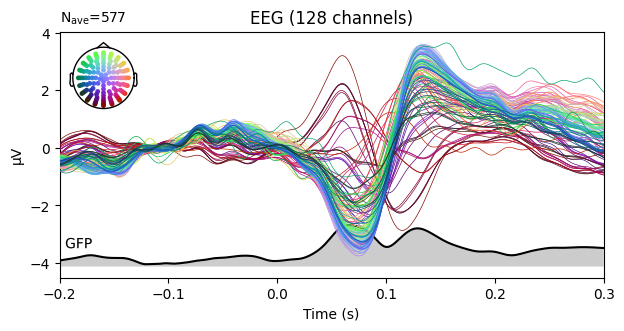

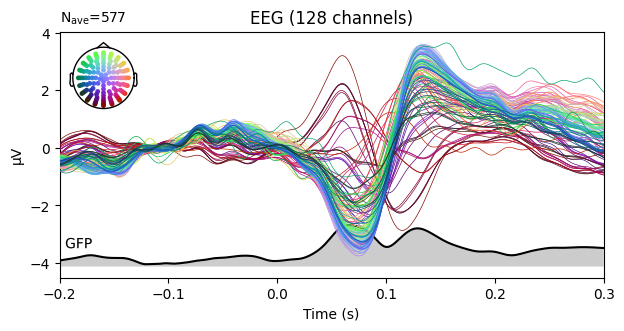

In [22]:
%matplotlib inline
#%matplotlib qt
evoked = epochs.average(picks=range(128))
# Plot the average response for each channel in the same figure
evoked.plot(spatial_colors=True, gfp=True)

In [6]:
np.where(ev_fix['latency'].diff()>80)

NameError: name 'ev_fix' is not defined

In [11]:
#epochs.plot_image(picks=range(128), combine='gfp')

In [10]:
eeg.annotations

<Annotations | 20144 segments: 250 (210), bad_ET (116), fixation (9862), ...>

In [11]:
eeg.plot_sensors(ch_type='eeg', axes=ax2d)

NameError: name 'eeg' is not defined

In [1]:
#pp[~( presents[:-1]==keyRight)]
#cmp_shelves_108_teddybear_021.jpg
#cmp_building_057_dog_014.jpg
#REMEMBER CORR ANS IS WRONG FOR THIS TWO
#and 
#Dog1962 T and cmp_meadow_001_dog_001 IT IS NOT target present I mean , the presumed target is not present in the imagesearch
#it should be hardcoded as Absent condition always

In [4]:
paths().results_path()
info = setup.exp_info()


In [10]:
logger = logging.getLogger()
logger.info("Percentage of correct answers: %.1f %%", 33)


In [30]:
info = setup.exp_info()
info.initialize_logging()
metadata_path = paths().full_metadata_path()
subjects_ids = info.subjects_ids
#----------parameters-------------
all_fixations = pd.DataFrame()  # Initialize an empty DataFrame
all_saccades = pd.DataFrame()


for sub_id in subjects_ids:
    eventos = pd.read_csv(os.path.join(metadata_path,f'{sub_id}_full_metadata.csv'))
    fixations_tmp = eventos[(eventos['type']=='fixation') & (eventos['phase']=='mem')]
    saccades_tmp = eventos[(eventos['type']=='saccade') & (eventos['phase']=='mem')]
    all_fixations = pd.concat([all_fixations, fixations_tmp], ignore_index=True)
    all_saccades  = pd.concat([all_saccades, saccades_tmp], ignore_index=True)


#all_fixations all_saccades
# sac_amplitude
# sac_vmax


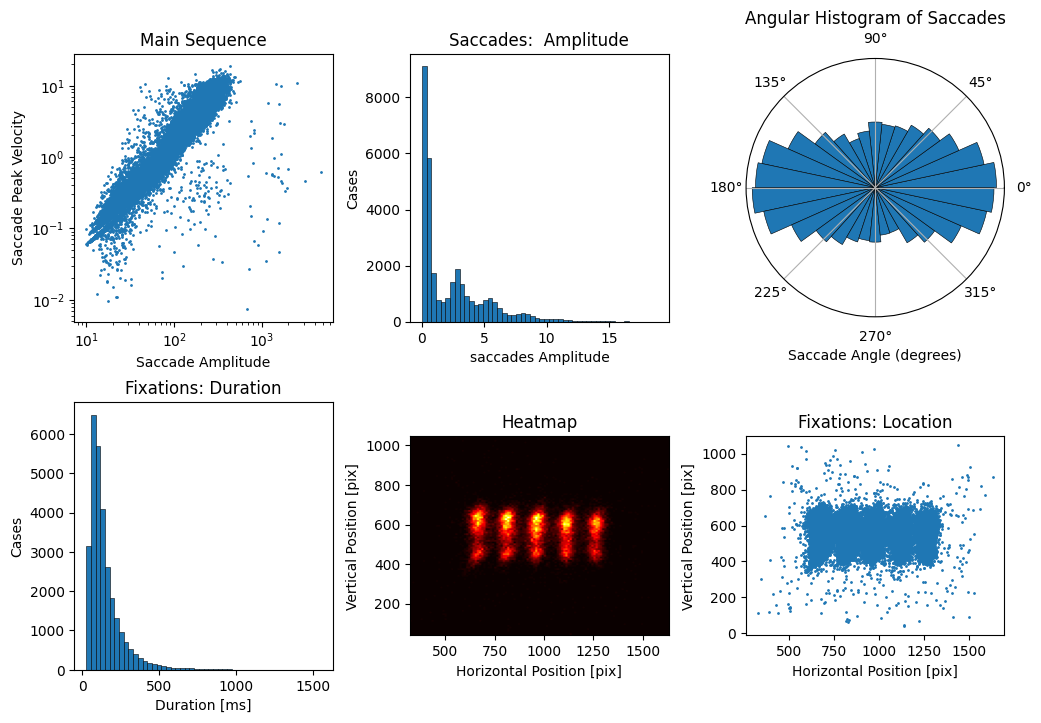

In [31]:
plot_eye_movements(all_fixations,all_saccades)

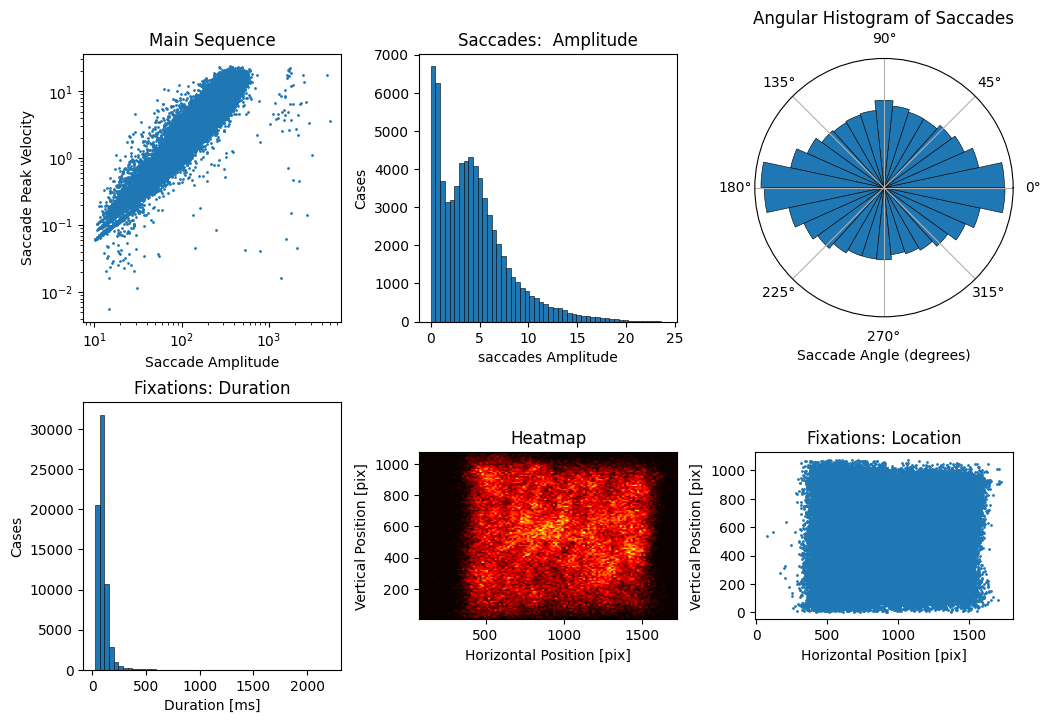

In [29]:
plot_eye_movements(all_fixations,all_saccades)

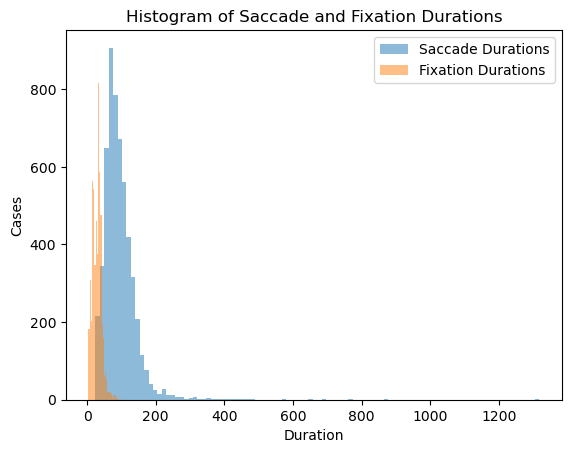

In [10]:
plt.hist(fixations_tmp['duration'], bins=100, alpha=0.5, label='Saccade Durations')
plt.hist(saccades_tmp['duration'], bins=30, alpha=0.5, label='Fixation Durations')

# Adding labels and title
plt.xlabel('Duration')
plt.ylabel('Cases')
plt.title('Histogram of Saccade and Fixation Durations')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [12]:
fix = evts[(evts['type'] == 'fixation') & (eventos['phase']=='vs')]
sac = evts[(evts['type'] == 'saccade') & (eventos['phase']=='vs')]
#print(f"Number of rows with 'fixation': {fixation_count}")
#print(f"Number of rows with 'saccade': {saccade_count}")

### UNFOLDERPY

In [4]:
info = setup.exp_info()
info.initialize_logging()
metadata_path = paths().full_metadata_path()
subjects_ids = info.subjects_ids

from unfoldpy.unfoldpy import Unfolder, create_design_matrix
#----------parameters-------------
eeg = load.subject(info,0).load_analysis_eeg()
eeg = load.subject(info,0).load_electrode_positions(eeg)
evts = load.subject(info,0).load_metadata()
ev_fix = evts[(evts['type']=='fixation') & (evts['phase']=='vs') & (evts['ondistractor']==1)]

from sklearn.linear_model import LinearRegression

feature_cols = 'mss' #None# 'mss'
intercept_evt   = 'fixation'
tmin ,tmax = -.2 , .4
sr = 500
unf=Unfolder(
        tmin, tmax, sr, feature_names=feature_cols, estimator=LinearRegression(),scoring='r2'
)
print(unf)

X = create_design_matrix(eeg,tmin,tmax,ev_fix,intercept_evt, feature_cols,sr)
X.shape


Ｌｏａｄｉｎｇ ＥＥＧ ｄａｔａ．．．．．
        ｓｕｂｊｅｃｔ   Ｓ１０１

Reading /Volumes/DAC500/Hybrid/Hybrid_preana_out/8.data_analysis/S101_analysis.fdt
Reading 0 ... 1769499  =      0.000 ...  3538.998 secs...


/Users/dac/Documents/repos/MNEdeconv/load.py:227: RuntimeWarning: Unknown types found, setting as type EEG:
eye: ['R-AREA', 'R-GAZE-X', 'R-GAZE-Y', 'TIME']
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)
/Users/dac/Documents/repos/MNEdeconv/load.py:227: RuntimeWarning: Estimated head radius (0.1 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)
/Users/dac/Documents/repos/MNEdeconv/load.py:227: RuntimeWarning: Not setting positions of 8 misc channels found in montage:
['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw     = mne.io.read_raw_eeglab( set_file, preload=True)



Ｌｏａｄｉｎｇ ｅｖｅｎｔｓ ｄａｔａ．．．．．
        ｆｒｏｍ

/Ｖｏｌｕｍｅｓ/ＤＡＣ５００/Ｈｙｂｒｉｄ/Ｈｙｂｒｉｄ_ａｎａ_ｏｕｔ/ｍｅｔａｄａｔａ/Ｓ１０１_ｆｕｌｌ_ｍｅｔａｄａｔａ．ｃｓｖ

<Unfolder | tmin, tmax : (-0.200, 0.400), estimator : <class 'sklearn.linear_model._base.LinearRegression'>, fit: False>


(1769500, 602)

In [3]:
channel_data = eeg.get_data().T
y  = channel_data[:,:128]
unf.fit(X,y)

features times delays 602 /n  n_feats 602


<Unfolder | tmin, tmax : (-0.200, 0.400), estimator : <class 'sklearn.linear_model._base.LinearRegression'>, features : [m, ..., s], fit: True>

In [6]:
X.shape
# feature_cols
# delays = _delays(tmin,tmax,sr)
# n_samples_window = len(delays)
# n_samples_window
len(np.arange(int(np.round(-0.2 * 500)), int(np.round(.4 * 500) + 1)))

301

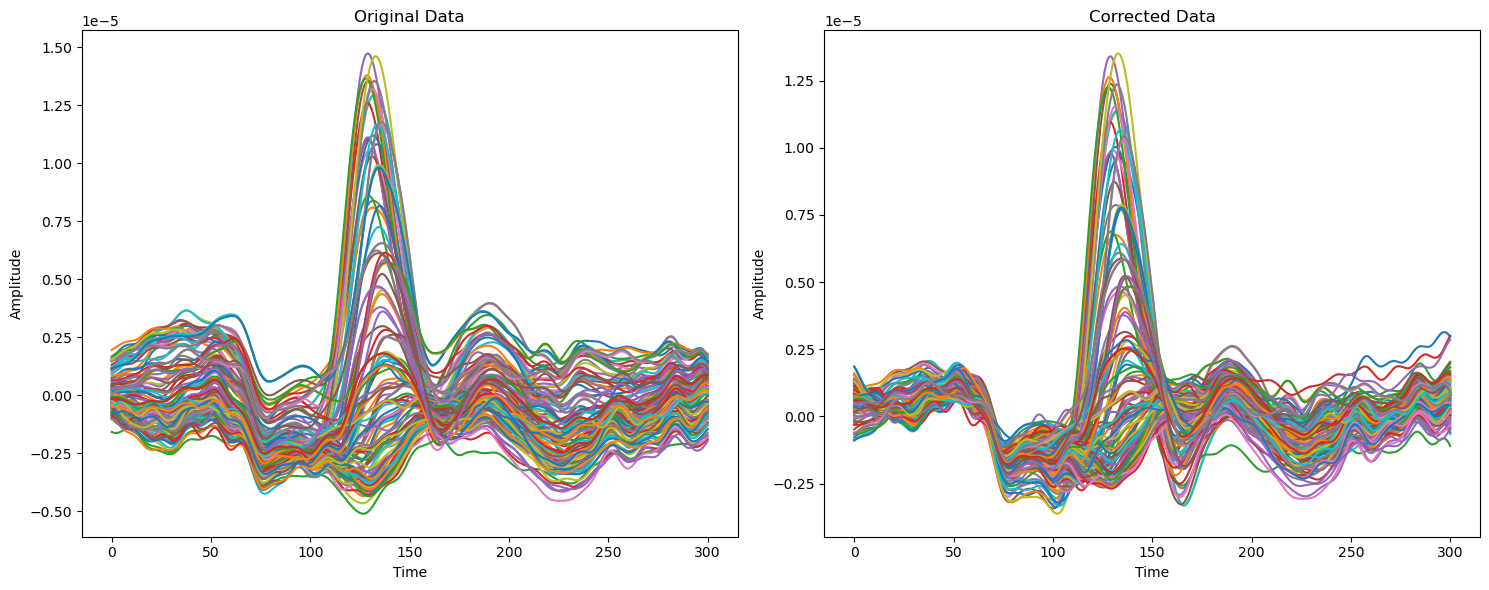

In [56]:
# for ch in range(128):
#     plt.plot(unf.coef_[ch,:301],lw=.4)
# plt.ylim(-14e-6,14e-6)
# plt.gca()  # Adjust the numerical value as per your desired ratio

# # Display the plot
# plt.show()

data = unf.coef_[:,:301]
base_lims = [-.2, 0 ]


times = np.linspace(unf.tmin,unf.tmax,unf.delays_)


# Assuming 'array' is your NumPy array

# Calculate the absolute differences between the array and the numbers
base_st = np.abs(times - base_lims[0])
base_end = np.abs(times - base_lims[1])

# Find the indices of the minimum differences
base_st_idx = np.argmin(base_st, axis=0)
base_end_idx = np.argmin(base_end, axis=0)

# Print the indices

# Assuming 'data' is your EEG data
baseline_data = data[:,base_st_idx:base_end_idx]  # Select the desired time interval

# Calculate the baseline correction values
baseline_values = np.mean(baseline_data, axis=1, keepdims=True)

# Perform baseline correction
corrected_data = data - baseline_values
# Define the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the original data
axs[0].plot(data.T)
axs[0].set_title('Original Data')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')

# Plot the corrected data
axs[1].plot(corrected_data.T)
axs[1].set_title('Corrected Data')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


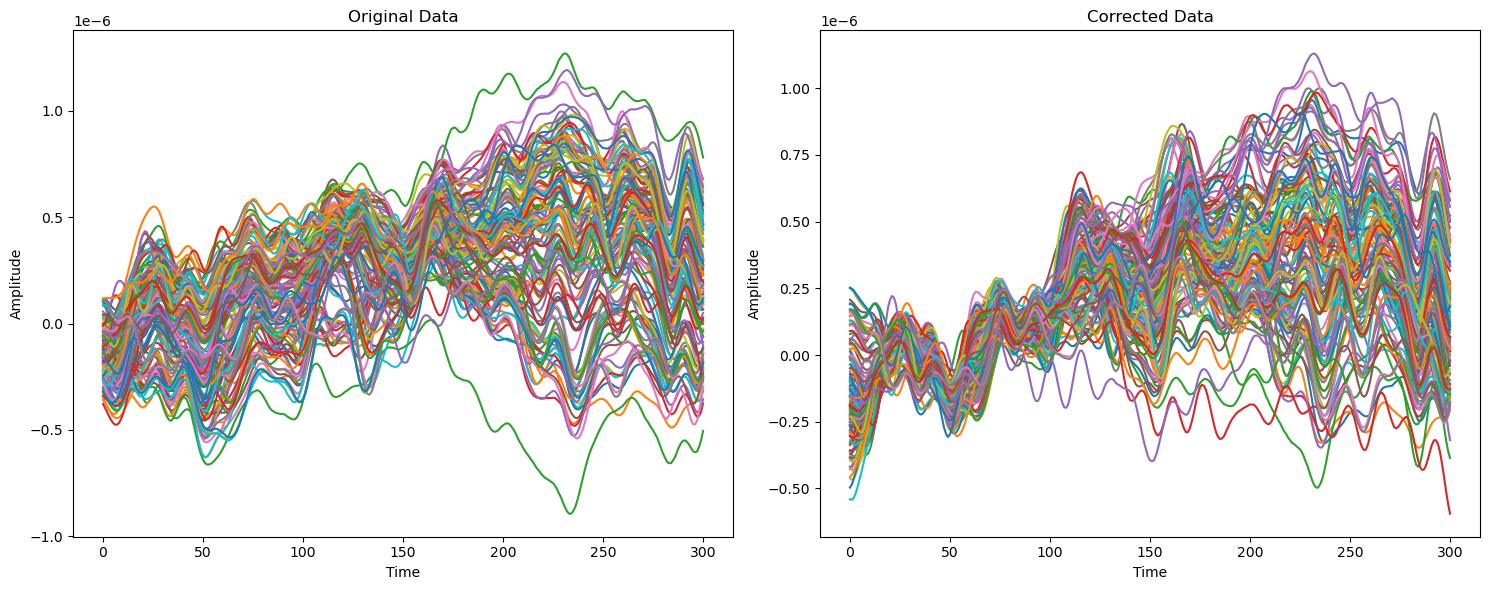

In [57]:
# for ch in range(128):
#     plt.plot(unf.coef_[ch,:301],lw=.4)
# plt.ylim(-14e-6,14e-6)
# plt.gca()  # Adjust the numerical value as per your desired ratio

# # Display the plot
# plt.show()

data = unf.coef_[:,301:]
base_lims = [-.2, 0 ]


times = np.linspace(unf.tmin,unf.tmax,unf.delays_)


# Assuming 'array' is your NumPy array

# Calculate the absolute differences between the array and the numbers
base_st = np.abs(times - base_lims[0])
base_end = np.abs(times - base_lims[1])

# Find the indices of the minimum differences
base_st_idx = np.argmin(base_st, axis=0)
base_end_idx = np.argmin(base_end, axis=0)

# Print the indices

# Assuming 'data' is your EEG data
baseline_data = data[:,base_st_idx:base_end_idx]  # Select the desired time interval

# Calculate the baseline correction values
baseline_values = np.mean(baseline_data, axis=1, keepdims=True)

# Perform baseline correction
corrected_data = data - baseline_values
# Define the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the original data
axs[0].plot(data.T)
axs[0].set_title('Original Data')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')

# Plot the corrected data
axs[1].plot(corrected_data.T)
axs[1].set_title('Corrected Data')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [1]:
#check duration of each phase , make function to see all the results as a df
xstar_samp, xstop_samp = start_stop_samples_trigg(evts,'cross1')
(xstop_samp-xstar_samp)/500


NameError: name 'start_stop_samples_trigg' is not defined

# Let's try cubic B-Splines to model saccades

In [32]:
info = setup.exp_info()
info.initialize_logging()
metadata_path = paths().full_metadata_path()
subjects_ids = info.subjects_ids

from unfoldpy.unfoldpy import Unfolder, create_design_matrix
#----------general parameters-------------
eeg = load.subject(info,0).load_analysis_eeg()
eeg = load.subject(info,0).load_electrode_positions(eeg)
evts = load.subject(info,0).load_metadata()
ev_fix = evts[(evts['type']=='fixation') & (evts['phase']=='vs') & (evts['ondistractor']==1)]
#-----------regression parameters------------
from sklearn.linear_model import LinearRegression
feature_cols = None# 'mss'
intercept_evt   = 'fixation'
tmin ,tmax = -.2 , .4
sr = 500
#-----------new spline feature parameters-------
spline_evt = 'saccade'
spline_feature = 'sac_amplitude'
degree = 3#cubic
knots = 3
#-----------------------------------------------
unf=Unfolder(
        tmin, tmax, sr, feature_names=feature_cols, estimator=LinearRegression(),scoring='r2'
)
print(unf)

X = create_design_matrix(eeg,tmin,tmax,ev_fix,intercept_evt, feature_cols,sr)
X.shape

array([-2.00000000e-01, -1.98000000e-01, -1.96000000e-01, -1.94000000e-01,
       -1.92000000e-01, -1.90000000e-01, -1.88000000e-01, -1.86000000e-01,
       -1.84000000e-01, -1.82000000e-01, -1.80000000e-01, -1.78000000e-01,
       -1.76000000e-01, -1.74000000e-01, -1.72000000e-01, -1.70000000e-01,
       -1.68000000e-01, -1.66000000e-01, -1.64000000e-01, -1.62000000e-01,
       -1.60000000e-01, -1.58000000e-01, -1.56000000e-01, -1.54000000e-01,
       -1.52000000e-01, -1.50000000e-01, -1.48000000e-01, -1.46000000e-01,
       -1.44000000e-01, -1.42000000e-01, -1.40000000e-01, -1.38000000e-01,
       -1.36000000e-01, -1.34000000e-01, -1.32000000e-01, -1.30000000e-01,
       -1.28000000e-01, -1.26000000e-01, -1.24000000e-01, -1.22000000e-01,
       -1.20000000e-01, -1.18000000e-01, -1.16000000e-01, -1.14000000e-01,
       -1.12000000e-01, -1.10000000e-01, -1.08000000e-01, -1.06000000e-01,
       -1.04000000e-01, -1.02000000e-01, -1.00000000e-01, -9.80000000e-02,
       -9.60000000e-02, -

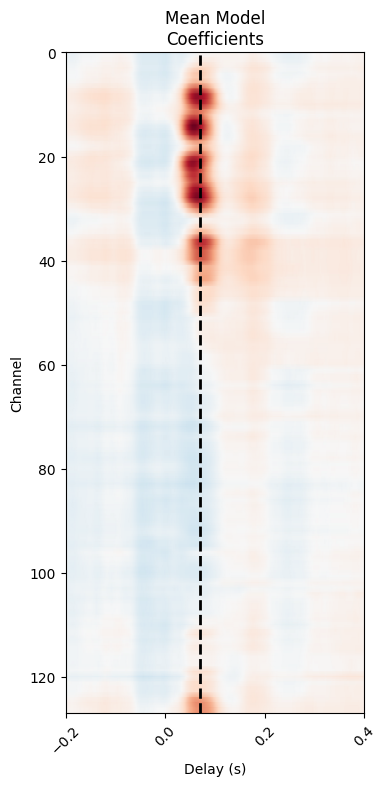

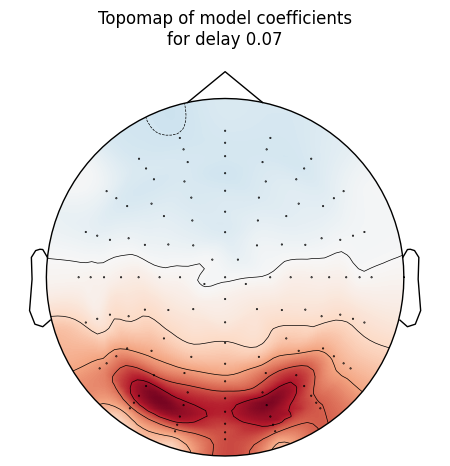

In [40]:
# unf.coef_.shape
# eeg.ch_names.index('A30')
# Print mean coefficients across all time delays / channels (see Fig 1)

n_channels = 128
ix_chs = np.arange(n_channels)
times = np.linspace(tmin,tmax, unf.delays_)
mean_coefs = unf.coef_
time_plot = 0.07  # For highlighting a specific time.
max_coef = mean_coefs.max()
picked_info = mne.pick_info(eeg.info, mne.pick_channels(eeg.info["ch_names"], include=eeg.info["ch_names"][:128]))

fig, ax = plt.subplots(figsize=(4, 8))
ax.pcolormesh(
    times,
    ix_chs,
    mean_coefs,
    cmap="RdBu_r",
    vmin=-max_coef,
    vmax=max_coef,
    shading="gouraud",
)
plt.axvline(time_plot, ls="--", color="k", lw=2)

ax.set(
    xlabel="Delay (s)",
    ylabel="Channel",
    title="Mean Model\nCoefficients",
    xlim=times[[0, -1]],
    ylim=[len(ix_chs) - 1, 0],
    xticks=np.arange(tmin, tmax + 0.2, 0.2),
)
plt.setp(ax.get_xticklabels(), rotation=45)
mne.viz.tight_layout()

# Make a topographic map of coefficients for a given delay (see Fig 2C)
ix_plot = np.argmin(np.abs(time_plot - times))
fig, ax = plt.subplots()


mne.viz.plot_topomap(
    mean_coefs[:, ix_plot], pos= picked_info,axes=ax, show=False, vlim=(-max_coef, max_coef)
)
ax.set(title="Topomap of model coefficients\nfor delay %s" % time_plot)

mne.viz.tight_layout()


In [88]:
 float(unf.sfreq)

500.0

In [1]:
evts

NameError: name 'evts' is not defined

In [5]:
load.subject(info,0).load_event_struct()


Ｌｏａｄｉｎｇ ｅｖｅｎｔｓ ｄａｔａ．．．．．
        ｆｒｏｍ

/ｍｅｄｉａ/ｄａｃ/ＳＳＤ－ｃｕｒｉｅ/Ｈｙｂｒｉｄ/Ｈｙｂｒｉｄ_ｐｒｅａｎａ_ｏｕｔ/９．ｅｖｅｎｔ_ｓｔｒｕｃｔｓ/Ｓ１０１_ｅｖｅｎｔｓ．ｃｓｖ

No event files found in directory: /media/dac/SSD-curie/Hybrid/Hybrid_preana_out/9.event_structs/


In [5]:
info.subjects_ids

['S101',
 'S102',
 'S103',
 'S104',
 'S105',
 'S106',
 'S107',
 'S108',
 'S109',
 'S110',
 'S111',
 'S112',
 'S113',
 'S114',
 'S115',
 'S116',
 'S117',
 'S118',
 'S119']

In [7]:
import numpy as np

m =    1576500  # Number of rows
n = 300*4  # Number of columns

matrix = np.empty((m, n))

# Calculate the size in megabytes

# Calculate the size in gigabytes
matrix_size = matrix.nbytes / (1024 ** 3)  # 1024 bytes = 1 kilobyte, 1024 kilobytes = 1 megabyte, 1024 megabytes = 1 gigabyte

print(f"The size of the empty matrix is approximately {matrix_size:.2f} gigabytes.")

The size of the empty matrix is approximately 14.10 gigabytes.


In [10]:
type(matrix[2,2])

numpy.float64

In [7]:
type('mss') is str

True

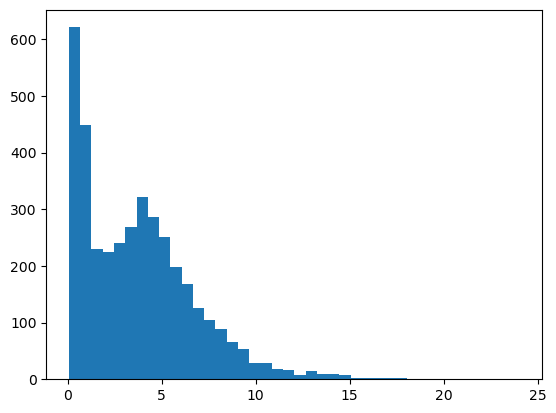

In [10]:
plt.hist(ev_fix['sac_amplitude'],bins=40)
plt.show()

In [38]:
import numpy as np
datos = np.random.normal(1.8,0.07,100000)

(array([2.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 1.100e+01, 1.800e+01,
        3.400e+01, 6.500e+01, 1.170e+02, 1.660e+02, 3.050e+02, 4.510e+02,
        7.020e+02, 1.086e+03, 1.479e+03, 2.034e+03, 2.645e+03, 3.440e+03,
        4.241e+03, 5.066e+03, 5.904e+03, 6.566e+03, 7.156e+03, 7.190e+03,
        7.355e+03, 7.157e+03, 6.720e+03, 6.100e+03, 5.445e+03, 4.341e+03,
        3.758e+03, 2.946e+03, 2.340e+03, 1.715e+03, 1.166e+03, 8.290e+02,
        5.390e+02, 3.600e+02, 2.370e+02, 1.370e+02, 7.900e+01, 4.500e+01,
        2.400e+01, 1.400e+01, 7.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.48770734, 1.50063314, 1.51355894, 1.52648474, 1.53941054,
        1.55233634, 1.56526214, 1.57818794, 1.59111374, 1.60403953,
        1.61696533, 1.62989113, 1.64281693, 1.65574273, 1.66866853,
        1.68159433, 1.69452013, 1.70744593, 1.72037173, 1.73329753,
        1.74622333, 1.75914913, 1.77207493, 1.78500072, 1.79792652,
        1.81085232, 1.82377812, 1.83

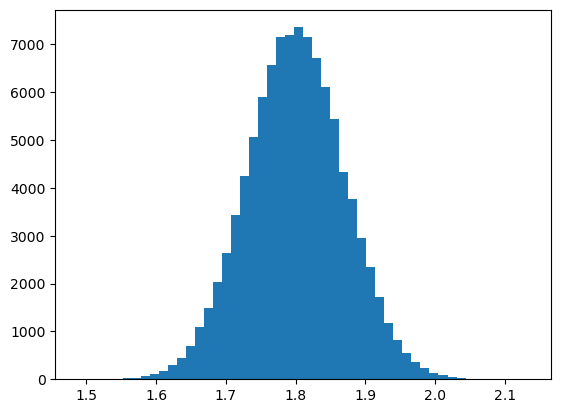

In [39]:
import matplotlib.pyplot as plt
plt.hist(datos,bins=50)

In [43]:
np.std(datos)

0.06980343185341688

In [1]:
mne.get_config_path(home_dir=None)

NameError: name 'mne' is not defined

In [4]:
#info.initialize_logging()
import logging
import datetime
log_filename = 'analysis_' + datetime.datetime.now().strftime('%Y%m%d%H%M%S') + '.log'
#logging.basicConfig(filename=os.path.join(self.log_path, log_filename), level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
log_filename


'analysis_20230706155445.log'